In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.mlab as mlab
%matplotlib inline 

In [31]:
data = pd.read_csv('./telcom_customer_churn.csv')
data.head(15)

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.00,0.00,0.0,0.0000,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.10,9.10,0.0,0.0000,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.00,0.00,0.0,0.0000,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.00,0.00,0.0,0.0000,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.00,0.00,0.0,0.0000,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005
5,82.2750,1312.25,75.000,1.2375,0.00,0.00,0.00,0.0,0.0000,156.75,...,0.0,U,U,U,U,U,U,Y,458.0,1000006
6,17.1450,0.00,16.990,0.0000,0.00,0.00,0.00,0.0,0.0000,0.00,...,0.0,N,U,U,U,U,U,Y,852.0,1000007
7,38.0525,682.50,52.490,0.2475,0.00,0.00,0.00,0.0,0.0000,147.50,...,1.0,S,U,U,U,U,U,Y,231.0,1000008
8,97.3375,1039.00,50.000,4.9500,419.50,41.95,41.95,0.0,0.0000,198.00,...,0.0,F,U,U,U,U,U,N,700.0,1000009
9,31.6625,25.50,29.990,0.2475,0.00,0.00,0.00,0.0,0.0000,59.50,...,1.0,N,U,U,U,U,U,Y,601.0,1000010


In [32]:
data.pop('Customer_ID')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 99 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     100

In [33]:
data.isnull().sum()/len(data)

rev_Mean       0.00357
mou_Mean       0.00357
totmrc_Mean    0.00357
da_Mean        0.00357
ovrmou_Mean    0.00357
                ...   
kid6_10        0.01732
kid11_15       0.01732
kid16_17       0.01732
creditcd       0.01732
eqpdays        0.00001
Length: 99, dtype: float64

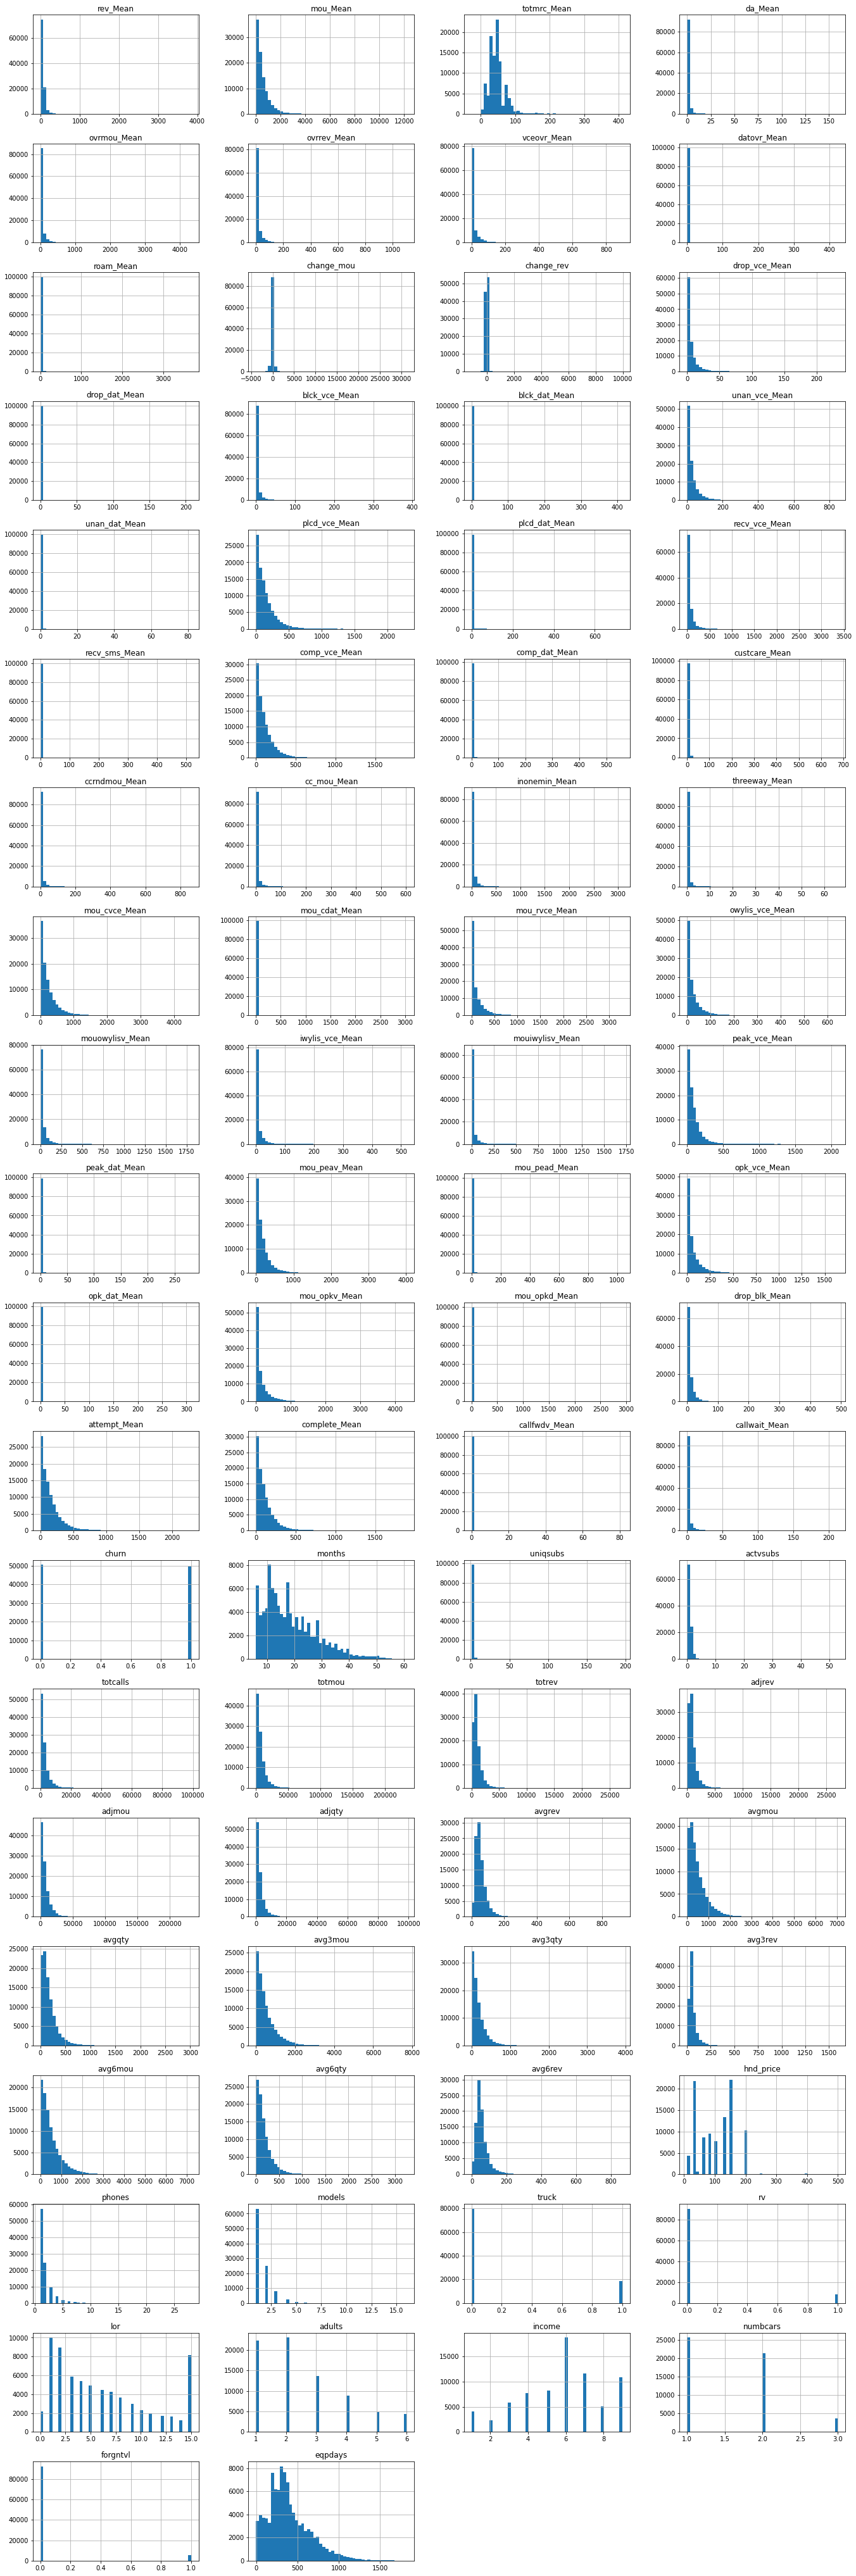

In [34]:
#data.hist(figsize=(15, 15));
data.hist(bins=50,figsize=(23,74),layout=(20,4));

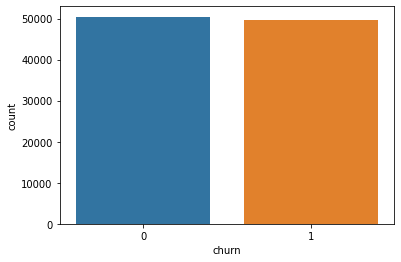

In [35]:
sns.countplot(x='churn',data=data);

In [36]:
data.columns[data.isnull().any()]

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'avg6mou', 'avg6qty', 'avg6rev', 'prizm_social_one',
       'area', 'dualband', 'refurb_new', 'hnd_price', 'phones', 'models',
       'hnd_webcap', 'truck', 'rv', 'ownrent', 'lor', 'dwlltype', 'marital',
       'adults', 'infobase', 'income', 'numbcars', 'HHstatin', 'dwllsize',
       'forgntvl', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15',
       'kid16_17', 'creditcd', 'eqpdays'],
      dtype='object')

In [37]:
miss = data.isnull().sum().sort_values(ascending = False).head(44)
miss_per = (miss/len(data))*100

pd.DataFrame({'No. missing values': miss, '% of missing data': miss_per.values})

,No. missing values,% of missing data
numbcars,49366,49.366
dwllsize,38308,38.308
HHstatin,37923,37.923
ownrent,33706,33.706
dwlltype,31909,31.909
lor,30190,30.190
income,25436,25.436
adults,23019,23.019
infobase,22079,22.079
hnd_webcap,10189,10.189


In [38]:
data.drop(['numbcars','dwllsize','HHstatin','ownrent','dwlltype','lor','income','adults','prizm_social_one','infobase','crclscod'],axis=1,inplace=True)

In [39]:
data['hnd_webcap']=data['hnd_webcap'].fillna('UNKW') # Handset web capability

data['avg6qty']=data['avg6qty'].fillna(data['avg6qty'].mean()) # Billing adjusted total number of calls over the life of the customer
data['avg6rev']=data['avg6rev'].fillna(data['avg6rev'].mean()) # Average monthly revenue over the life of the customer
data['avg6mou']=data['avg6mou'].fillna(data['avg6mou'].mean()) # Average monthly minutes of use over the life of the customer

data['change_mou']=data['change_mou'].fillna(data['change_mou'].mean()) # Percentage change in monthly minutes of use vs previous three month average
data['change_rev']=data['change_rev'].fillna(data['change_rev'].mean()) # Percentage change in monthly revenue vs previous three month average

data['rev_Mean']=data['rev_Mean'].fillna(data['rev_Mean'].mean())
data['totmrc_Mean']=data['totmrc_Mean'].fillna(data['totmrc_Mean'].mean())
data['da_Mean']=data['da_Mean'].fillna(data['da_Mean'].mean())
data['ovrmou_Mean']=data['ovrmou_Mean'].fillna(data['ovrmou_Mean'].mean())
data['ovrrev_Mean']=data['ovrrev_Mean'].fillna(data['ovrrev_Mean'].mean())
data['vceovr_Mean']=data['vceovr_Mean'].fillna(data['vceovr_Mean'].mean())
data['datovr_Mean']=data['datovr_Mean'].fillna(data['datovr_Mean'].mean())
data['roam_Mean']=data['roam_Mean'].fillna(data['roam_Mean'].mean())
data['mou_Mean']=data['mou_Mean'].fillna(data['mou_Mean'].mean())


In [40]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97403 entries, 0 to 99999
Data columns (total 88 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rev_Mean         97403 non-null  float64
 1   mou_Mean         97403 non-null  float64
 2   totmrc_Mean      97403 non-null  float64
 3   da_Mean          97403 non-null  float64
 4   ovrmou_Mean      97403 non-null  float64
 5   ovrrev_Mean      97403 non-null  float64
 6   vceovr_Mean      97403 non-null  float64
 7   datovr_Mean      97403 non-null  float64
 8   roam_Mean        97403 non-null  float64
 9   change_mou       97403 non-null  float64
 10  change_rev       97403 non-null  float64
 11  drop_vce_Mean    97403 non-null  float64
 12  drop_dat_Mean    97403 non-null  float64
 13  blck_vce_Mean    97403 non-null  float64
 14  blck_dat_Mean    97403 non-null  float64
 15  unan_vce_Mean    97403 non-null  float64
 16  unan_dat_Mean    97403 non-null  float64
 17  plcd_vce_Mea

In [41]:
sum(data.isnull().sum()>0)

0

In [42]:
numerical_features = ['months', 'uniqsubs', 'actvsubs', 'totcalls', 'avg3qty', 'avg3rev','rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'datovr_Mean', 
                      'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 
                      'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'threeway_Mean', 'mou_cvce_Mean', 
                      'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 
                      'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'drop_blk_Mean', 'callfwdv_Mean', 'callwait_Mean', 'totmou', 
                      'totrev', 'avgrev', 'avgmou', 'avgqty', 'avg6mou', 'avg6rev', 'hnd_price', 'phones', 'models', 'truck', 'rv', 'forgntvl', 'eqpdays']

In [43]:
for i in numerical_features:    
    f_sqrt= (lambda x: np.sqrt(abs(x)) if (x>=1) or (x<=-1) else x)
    data[i] = data[i].apply(f_sqrt)

In [44]:
obj_df = data.select_dtypes(include=['object']).copy()
obj_df.columns.tolist()

['new_cell',
 'asl_flag',
 'area',
 'dualband',
 'refurb_new',
 'hnd_webcap',
 'marital',
 'ethnic',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd']

In [45]:
#ohe_encoding 
df_ohe = pd.get_dummies(data[['new_cell', 'asl_flag', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 
                'marital', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10',
                'kid11_15', 'kid16_17', 'creditcd']], drop_first=True)
df = data.join(df_ohe).drop(ohe_encoding, axis=1)
display(df.shape)

(97403, 126)

In [46]:
# Create correlation matrix
corr_matrix = df.corr().abs()
# print(corr_matrix)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
df.drop(df[to_drop], axis=1,inplace=True)

/tmp/ipykernel_10618/3267273807.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [47]:
c = df.corr()['churn'].abs()
sc = c.sort_values()
sc

ethnic_G             0.000215
area_CHICAGO AREA    0.000550
totcalls             0.000639
rv                   0.000650
recv_sms_Mean        0.000882
                       ...   
mou_Mean             0.070034
hnd_webcap_WCMB      0.092581
hnd_price            0.105378
eqpdays              0.116735
churn                1.000000
Name: churn, Length: 121, dtype: float64

In [48]:
a = dict(sc.tail(40))
b = a.keys()
print(sorted(b))

['asl_flag_Y', 'avg3mou', 'avg3qty', 'avg6mou', 'avg6qty', 'callwait_Mean', 'cc_mou_Mean', 'ccrndmou_Mean', 'churn', 'comp_vce_Mean', 'custcare_Mean', 'dualband_T', 'eqpdays', 'ethnic_O', 'ethnic_Z', 'hnd_price', 'hnd_webcap_WC', 'hnd_webcap_WCMB', 'inonemin_Mean', 'iwylis_vce_Mean', 'models', 'months', 'mou_Mean', 'mou_cvce_Mean', 'mou_opkv_Mean', 'mou_peav_Mean', 'mou_rvce_Mean', 'mouiwylisv_Mean', 'mouowylisv_Mean', 'opk_vce_Mean', 'owylis_vce_Mean', 'peak_vce_Mean', 'phones', 'plcd_vce_Mean', 'recv_vce_Mean', 'refurb_new_R', 'threeway_Mean', 'totmrc_Mean', 'unan_vce_Mean', 'uniqsubs']


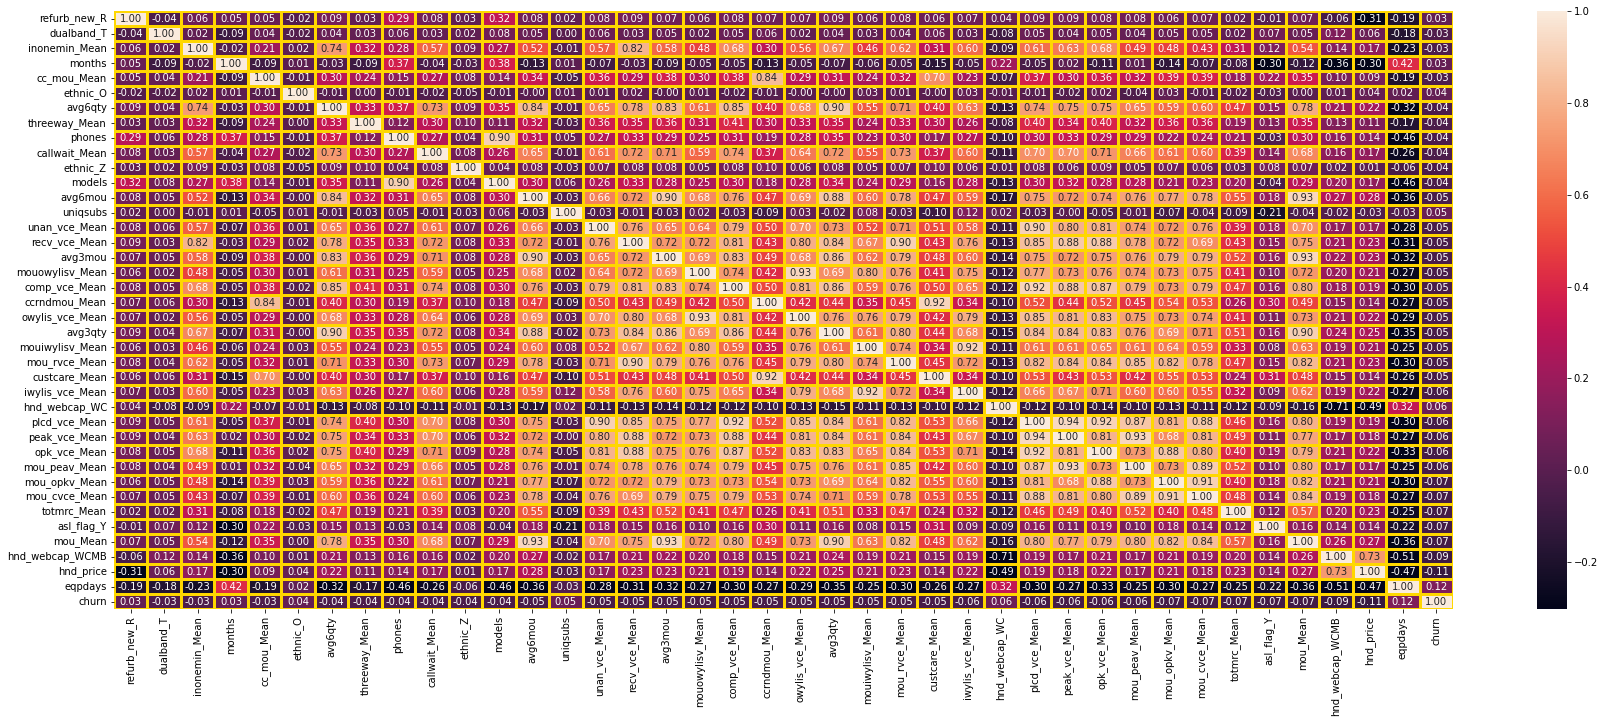

In [49]:
plt.figure(figsize=(30,11))
sns.heatmap(df[b].corr(), annot = True, fmt = ".2f",robust=True,linewidths=1.3,linecolor = 'gold')
plt.show()

<AxesSubplot:>

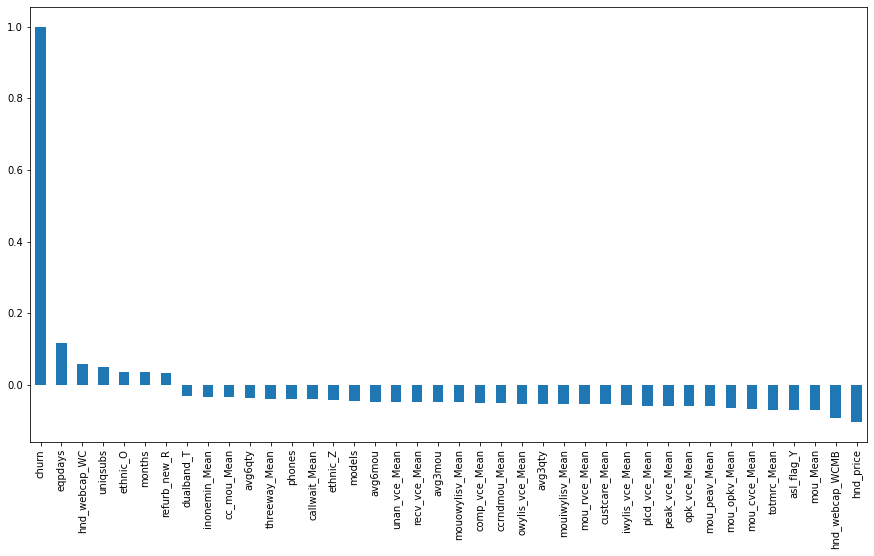

In [50]:
plt.figure(figsize=(15,8))
df[b].corr()['churn'].sort_values(ascending = False).plot(kind='bar')

In [54]:
# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

# modelling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

from xgboost import XGBClassifier



/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [62]:
features = df.drop('churn',axis=1)
target = df['churn']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [63]:
print('features_train:',features_train.shape), print('target_train: ',target_train.shape)
# print('features_valid: ',features_valid.shape), print('target_valid: ',target_valid.shape)
print('features_test: ',features_test.shape), print('target_test: ',target_test.shape)

features_train: (77922, 120)
target_train:  (77922,)
features_test:  (19481, 120)
target_test:  (19481,)


(None, None)

In [64]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    '''
     Calculate and prints the following metrics for train set and test set:
     Accuracy, F1 , APS and ROC AUC
     Prints 3 graphs:
     F1 Score, ROC curve and PRC 
    '''
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

In [65]:
def model_eval(model_name, param_grid, model_headline, features_train, target_train, features_test, target_test):
    '''
    Creates a pipeline with standard scaling and the given model.
    Runs a grid search with cross validation on the train set with the given hyperparameters.
    Prints the best esrimator models and hyperparameters.
    Predicts on the test set. (use predict proba on possibe models).
    Prints the model's confusion matrix.
    Returns a DF row of the model headline, evaluation metrics and best estimator.
    '''
    # creating a pipeline
    pipeline = Pipeline([('scale', StandardScaler()), ('model', model_name)])
    # gridsearchcv model
    model = GridSearchCV(pipeline, param_grid=param_grid , cv=5, scoring= 'roc_auc')
    model.fit(features_train, target_train)
    print(model.best_estimator_)
#     print(model.best_score_.round(3))
    if hasattr(model.best_estimator_._final_estimator, 'predict_proba'):
        test_predict_p = model.predict_proba(features_test)[:,1] 
        roc_auc = roc_auc_score(target_test, test_predict_p)
    else:
        test_predict = model.predict(features_test)
        roc_auc = roc_auc_score(target_test, test_predict)
    test_predict = model.predict(features_test)
    
    try:
        # get importance
        importance = model.best_estimator_._final_estimator.feature_importances_
        # summarize feature importance
        feature_importances=pd.DataFrame({'features':features_test.columns,'importance':importance})
        print("Top 12 important features")
#         print("Features importance")
        display(feature_importances.sort_values('importance',ascending=False),head[12])
    except:
        try:
            feature_importances=pd.DataFrame({'feature':list(features_test.columns),'importance':[abs(i) for i in grid.best_estimator_._final_estimator.coef_[0]]})
            # summarize feature importance
            print("Top 12 important features")
            display(feature_importances.sort_values('importance',ascending=False).head[12])
        except:
            print('There is no feature_importances_ attribute for this model')
            
    cm = confusion_matrix(target_test, test_predict)
    # visualize confusion matrix with seaborn heatmap

    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
#     print(test_predict)
    f1 = f1_score(target_test, test_predict)
    acc = accuracy_score(target_test, test_predict)
    evaluate_model(model, features_train, target_train, features_test, target_test)


    return(pd.DataFrame([[ model.best_score_.round(3),  
                          acc , f1, roc_auc, model.best_estimator_]], 
                        columns=['Train AUC ROC',
                                 'Test Accuracy', 'Test F1','Test AUC ROC','Model Params'],
                       index=[model_headline]))

Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=5, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=50, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=42, reg_alpha=0,
                         

NameError: name 'results' is not defined

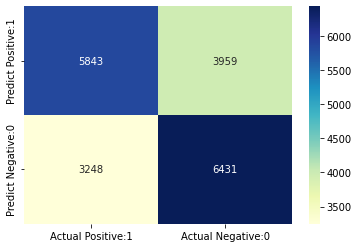

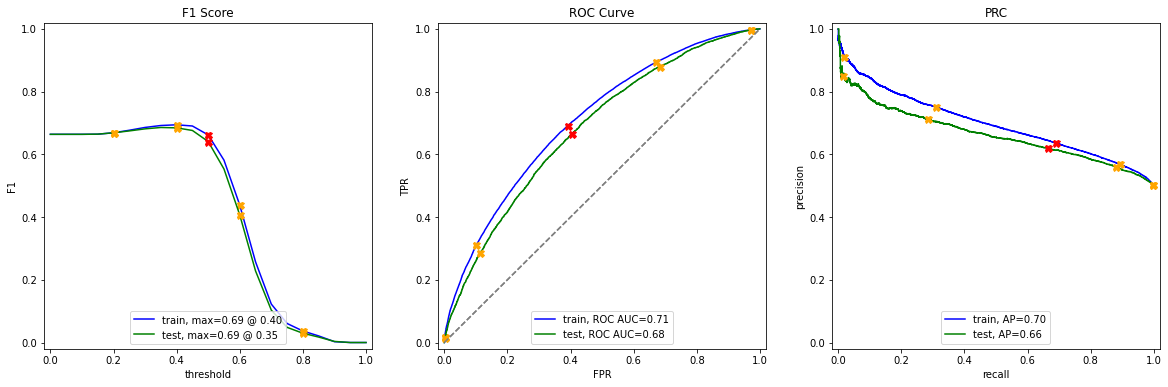

In [66]:
%%time

params = {'model__n_estimators' : [5, 10, 50], 'model__learning_rate' : [0.1, 0.01], 'model__max_depth' : [3,5,10]}
model   = XGBClassifier(random_state=42, verbosity = 0)
name    ='XGBoost'
result_row = model_eval(model, params, name, features_train, target_train, features_test, target_test)

results = results.append(result_row)